In [14]:
# Load important libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

digits = load_digits()

# Introduction

### MNIST Data Description

The MNIST dataset is a widely used dataset in the field of machine learning and computer vision. It consists of a collection of handwritten digits from 0 to 9, captured as grayscale images. The dataset is frequently used as a benchmark for image classification tasks and serves as a common dataset for testing and comparing different machine learning algorithms.

The MNIST dataset contains 60,000 training examples and 10,000 test examples. Each image in the dataset has a fixed size of 28x28 pixels, resulting in a total of 784 features. Each pixel value represents the grayscale intensity ranging from 0 (black) to 255 (white). 

Due to its simplicity and availability, the MNIST dataset has become a standard dataset for developing and evaluating various image classification algorithms, including deep learning models. It provides a useful starting point for beginners in the field of machine learning to learn and experiment with image recognition tasks.

### Purpose of Classification

The goal of the dataset is to classify the handwritten digits correctly based on the image data.

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


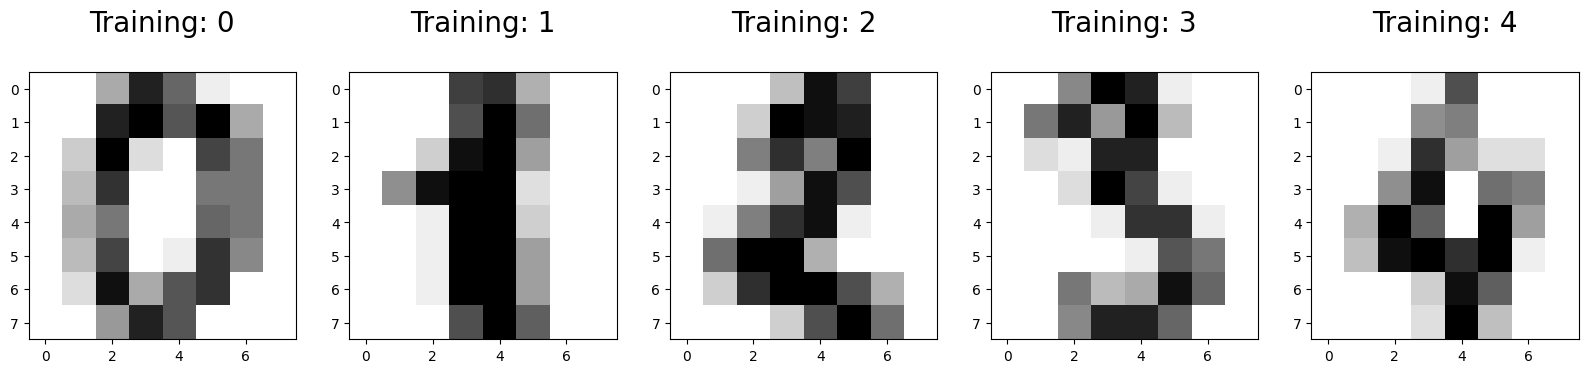

In [35]:
sz = 5
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:sz], digits.target[0:sz])):
    plt.subplot(1, sz, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray_r)
    plt.title('Training: %i\n' % label, fontsize = 20)

# Model Training & Testing Sets

The purpose of the train and test sets:
- Train data (X_train) and train target (y_train) are used to train a machine learning model.
- Test data (X_test) and test target (y_test) are used to evaluate the performance of the trained model on unseen data.
- By splitting the dataset into train and test sets, we can estimate how well the model generalizes to new, unseen data.

In [5]:
# Random state
r = 42

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=r)

# Print the shape of the data arrays
print('Train data shape:', X_train.shape)
print('Train target shape:', Y_train.shape)
print('Test data shape:', X_test.shape)
print('Test target shape:', Y_test.shape)

Train data shape: (1437, 64)
Train target shape: (1437,)
Test data shape: (360, 64)
Test target shape: (360,)


# Random Forest Modeling

In [7]:
# Create a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=r)

# Train the model using the training data
model.fit(X_train, Y_train)

# Predict the labels for the test data
Y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = model.score(X_test, Y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9722222222222222


# Parameter Tuning

The max_depth parameter will be used for tuning. This parameter has the potential to affect the model's overfitting and underfitting characteristics. This important for datasets that are big such as that for image processing.

In [8]:
# Create a parameter grid of n_estimators and max_depths
param_grid = {
    'max_depth': [10, 20, 30]
}

# Create a based model
rf = RandomForestClassifier(random_state=r)

# Create a GridSearchCV object to obtain best max_depth parameter by passing a RandomForestClassifier
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Get the best parameter value
best_max_depth = grid_search.best_params_['max_depth']

print('Accuracy ensemble:',grid_search.score(X_test, Y_test))

# Train the model with the best parameter value
best_model = RandomForestClassifier(n_estimators=100, max_depth=best_max_depth, random_state=r)
best_model.fit(X_train, Y_train)

# Evaluate the best model's accuracy
accuracy = best_model.score(X_test, Y_test)
print('Accuracy:', accuracy)

print('\nThe following tuned parameter will be used on the model below:\n', best_max_depth)

Accuracy ensemble: 0.9722222222222222
Accuracy: 0.9722222222222222

The following tuned parameter will be used on the model below:
 20


# Fine Tuned Random Forest

The best value for the max_depth obtained from a grid search will be used for testing on the test data. This value was obtained through a rigorous grid search and has been found to be the optimum value. Hence, it will be used to set the max depth of the Rando Forest.

In [11]:
# Create a RandomForestClassifier with max_depth = best_max_depth
rf_model = RandomForestClassifier(max_depth=best_max_depth)

# Train the model on the training data
rf_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = rf_model.predict(X_test)

Accuracy: 0.9722222222222222
Precision: 0.9740091781393408
Recall: 0.9714748820224415
F1 Score: 0.9722506113169403


# Model Perfomance Evaluation

In [36]:
# Evaluate the model's performance on the test data
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9722222222222222
Precision: 0.9740091781393408
Recall: 0.9714748820224415
F1 Score: 0.9722506113169403


The model generally strugles with the digits 0, 3, 5, 6, 7, 8, and 9.

However it strugles the most with digits 5 and 8 where 4% and 10% of the digits were predicted incorrectly respectively.

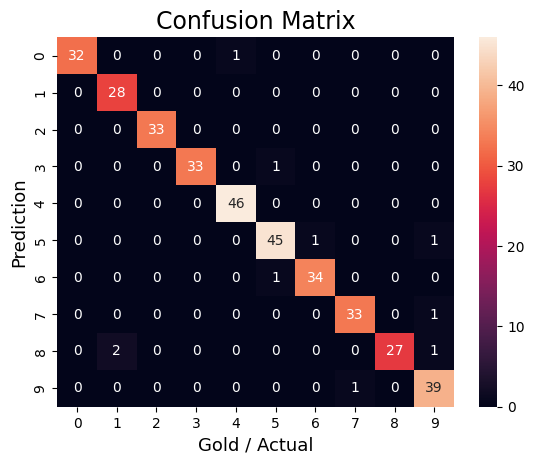

In [17]:
# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')

plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Gold / Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()